In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# DATA PREPROCESSING PART 1

In [ ]:
df.drop(columns=['salary','salary_currency'],inplace=True)               #drop salary and salary column and make usd universal
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [ ]:
check_missing=df.isnull().sum()*100/df.shape[0]                         #check the missing value
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
df.select_dtypes(include='object').nunique()       #check the number of unique value in an object datatype

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

# CATEGORIZE THE JOB TITLE

In [ ]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
def segment_job_title(job_title):
    Data_scientist_titles=['Principal Data Scientist','Data Scientist','Applied Scientist','Research Scientist','Applied Data Scientist']
    Machine_learning_titles=['ML Engineer','Machine Learning Engineer','Applied Machine Learning Engineer','Machine Learning Software Engineer','NLP Engineer']
    Data_analyst_titles=['Data Analyst', 'Data Quality Analyst','Compliance Data Analyst', 'Business Data Analyst','Data Analytics Manager']
    Data_engineer_titles=['Data Modeler', 'Data Engineer','ETL Engineer','Data DevOps Engineer','Data Science Engineer','Data Infrastructure Engineer']
    Bi_analytics_titles=['Data Analytics Manager','Computer Vision Engineer','AI Developer','Big Data Architect''Head of Data Science']
    Other_titles=['BI Data Engineer','Director of Data Science', 'Machine Learning Scientist','MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician','Applied Machine Learning Scientist', 'Lead Data Scientist','Cloud Database Engineer', 'Financial Data Analyst','Data Infrastructure Engineer', 'Software Data Engineer','AI Programmer', 'Data Operations Engineer', 'BI Developer','Data Science Lead', 'Deep Learning Researcher', 'BI Analyst','Data Science Consultant', 'Data Analytics Specialist']

    if job_title in Data_scientist_titles:
        return 'Data scientist'
    elif job_title in Machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in Data_analyst_titles:
        return 'Data Analyst'
    elif job_title in Data_engineer_titles:
        return 'Data Engineer'
    elif job_title in Bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in Other_titles:
        return 'Other'
    else:
        return 'Uncategorized'


In [ ]:
df['job_title']=df['job_title'].apply(segment_job_title)

<Axes: >

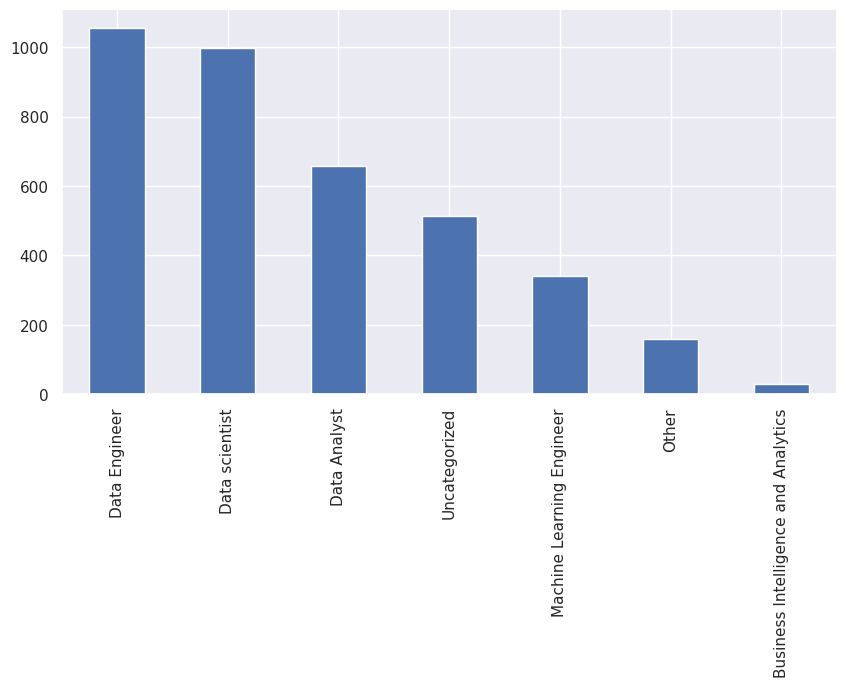

In [ ]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar')

# CATEGORIZE THE EMPLOYEE RESIDENCE

In [ ]:
df.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [ ]:
def categorize_region(country):
    if country in ['DE','GB','PT','NL','CH','CF','FR','FI','UA','IE','AT']:
        return 'Europe'
    elif country in ['US','CA','MX']:
        return 'North America'
    elif country in ['BR','AR','CL','BO','CR','DO','PR','HN','UV']:
        return 'South America'
    elif country in ['NG','GH','KE','TN','DZ']:
        return 'Africa'
    elif country in ['HK','IN','CN','JP','KR','BD','VN','PH','MY','ID','AE']:
        return 'Asia'
    elif country in ['AU','NZ']:
        return 'Oceania'
    else :
        return 'Unknown'



In [ ]:
df['employee_residence']=df['employee_residence'].apply(categorize_region)

<Axes: >

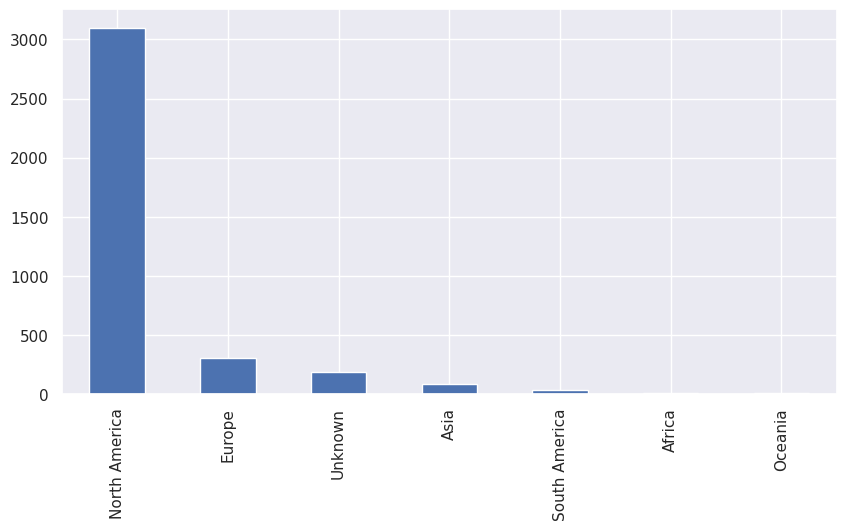

In [ ]:
plt.figure(figsize=(10,5))
df['employee_residence'].value_counts().plot(kind='bar')

# CATEGORIZE THE COMPANY LOCATION

In [ ]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [ ]:
df['company_location']=df['company_location'].apply(categorize_region)

<Axes: >

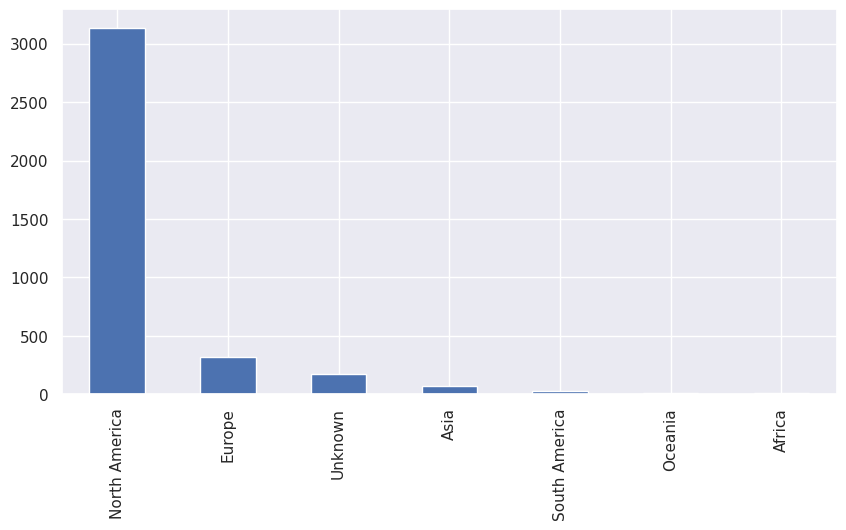

In [ ]:
plt.figure(figsize=(10,5))
df['company_location'].value_counts().plot(kind='bar')

In [ ]:
#check the number of unique values on object datatype
df.select_dtypes(include='object').nunique()

experience_level      4
employment_type       4
job_title             7
employee_residence    7
company_location      7
company_size          3
dtype: int64

# EXPLORATORY DATA  ANALYSIS


In [ ]:
df.remote_ratio.unique()

array([100,   0,  50])

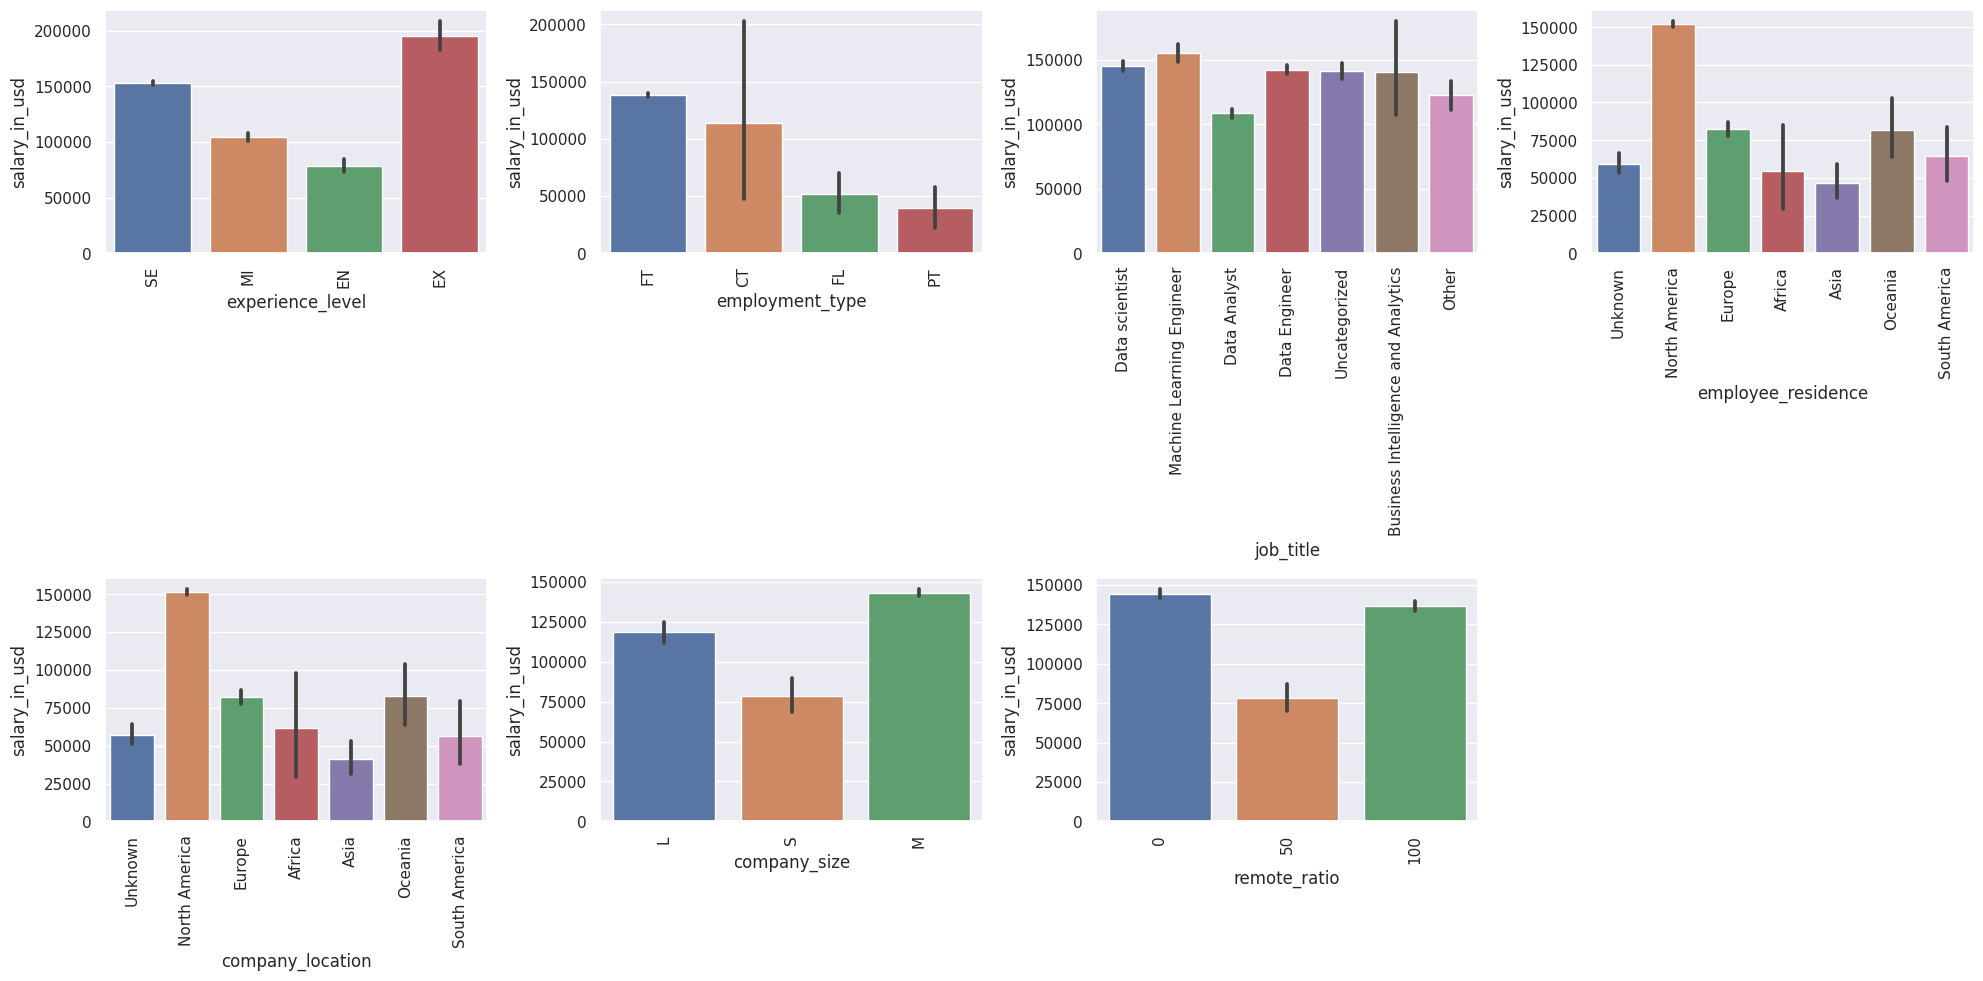

In [ ]:
#list of categorical variables to plot
cat_vars=['experience_level','employment_type','job_title','employee_residence',
          'company_location','company_size','remote_ratio']

#create figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(20,10))
axs=axs.flatten()

#create barplot for each categroical variable
for i,var in enumerate(cat_vars):
    sns.barplot(x=var,y='salary_in_usd',data=df,ax=axs[i],estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

#remove the eighth subplot
fig.delaxes(axs[7])

#adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

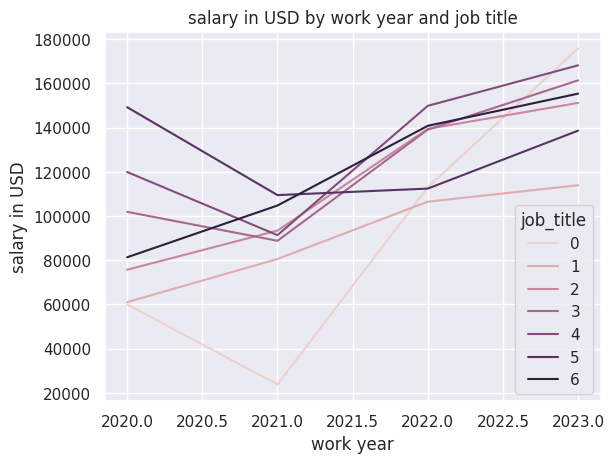

In [ ]:
sns.set_style("darkgrid")

sns.set_palette("Set2")

sns.lineplot(x='work_year',y='salary_in_usd',hue='job_title',data=df,errorbar=None,estimator=np.mean)

plt.title("salary in USD by work year and job title")

plt.xlabel("work year")

plt.ylabel("salary in USD")

plt.show

# DATA PREPROCESSING PART 2
# LABEL ENCODING FOR OBJECT DATATYPE

In [ ]:
#LOOP FOR EACH COLUMN IN THE DATAFRAME WHERE DTYPE IS OBJECT
for col in df.select_dtypes(include=['object']).columns:

    #print the column name and unique values
    print(f"{col}:{df[col].unique()}")

experience_level:['SE' 'MI' 'EN' 'EX']
employment_type:['FT' 'CT' 'FL' 'PT']
job_title:['Data scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence and Analytics'
 'Other']
employee_residence:['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_location:['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_size:['L' 'S' 'M']


In [ ]:
from sklearn import preprocessing

#loop over each column in the dataframe where dtype is object
for col in df.select_dtypes(include=['object']).columns:

    #initialize a label encoder object
    label_encoder=preprocessing.LabelEncoder()

    #fit the encoder to the unique values in column
    label_encoder.fit(df[col].unique())

    #transform the column using encoder
    df[col]=label_encoder.transform(df[col])

    #print the column name and the unique encoded value
    print(f"{col}:{df[col].unique()}")


experience_level:[3 2 0 1]
employment_type:[2 0 1 3]
job_title:[3 4 1 2 6 0 5]
employee_residence:[6 3 2 0 1 4 5]
company_location:[6 3 2 0 1 4 5]
company_size:[0 2 1]


In [ ]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

# ALL OF THE DATA ARE CATEGORICAL SO IT MEANS NO OUTLIERS

<Axes: >

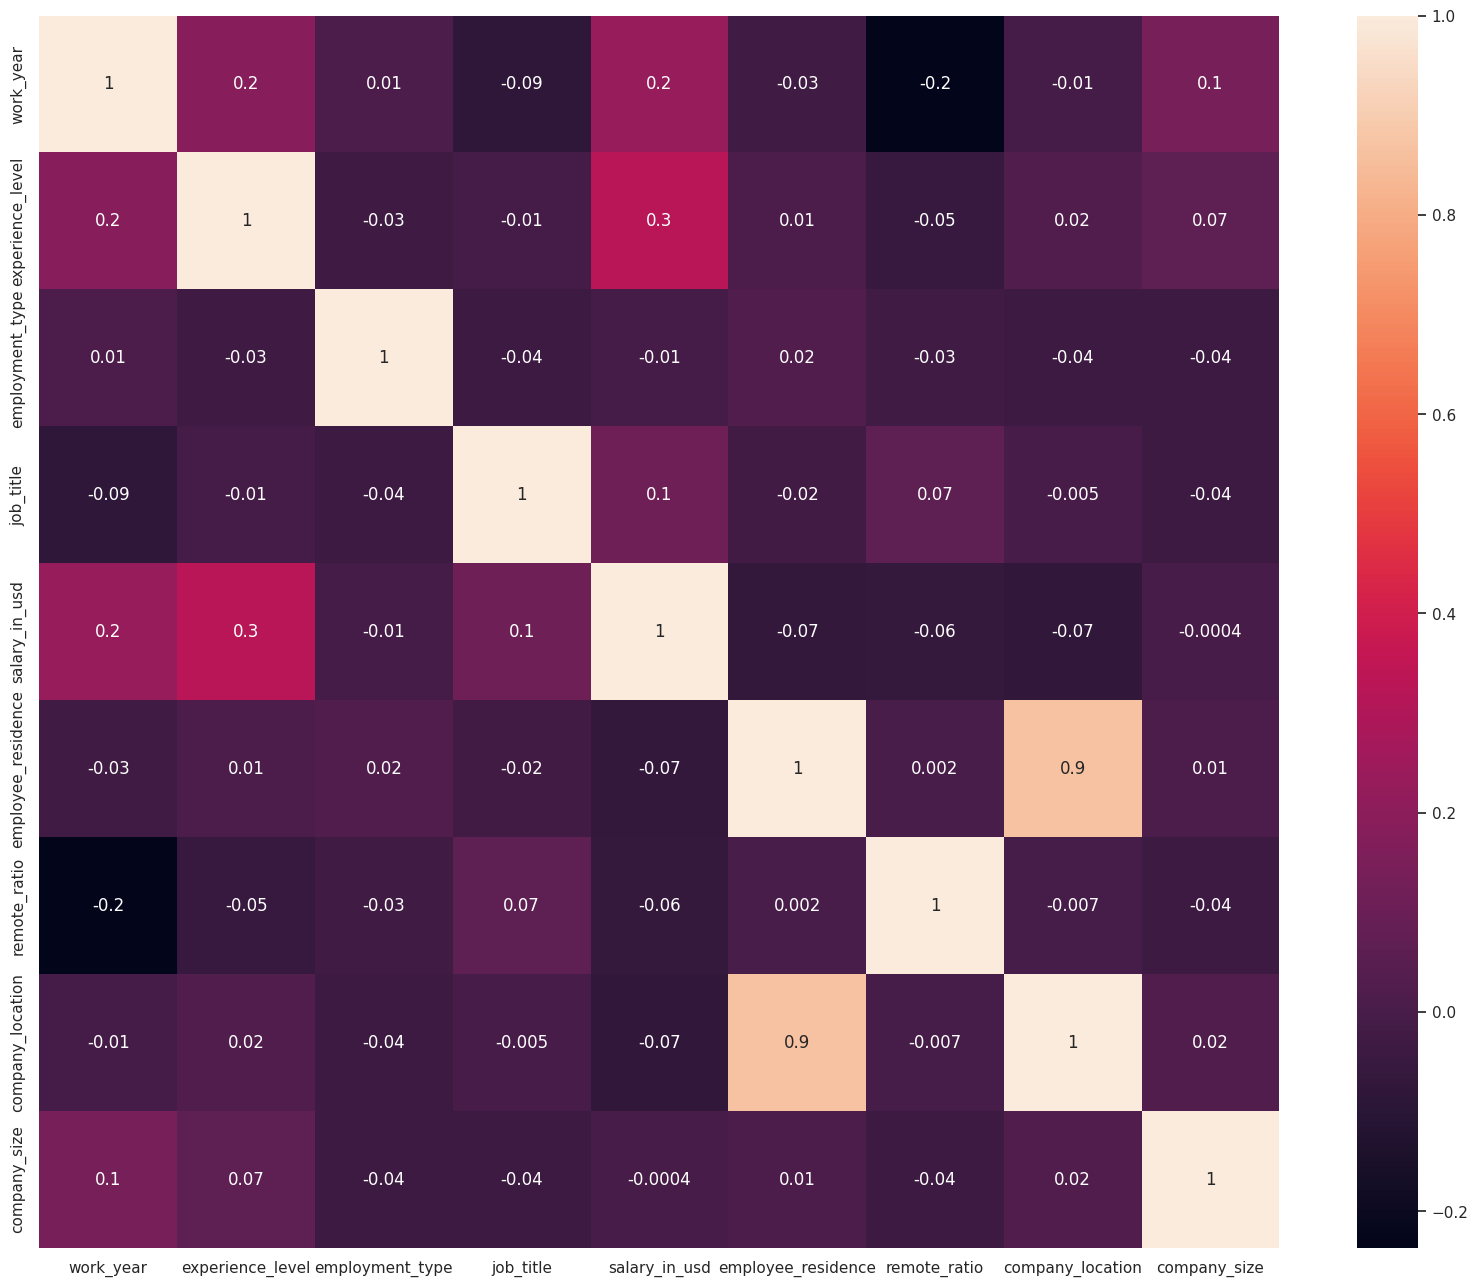

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),fmt='.1g',annot=True)

# TRAIN TEST SPLIT


In [ ]:
x=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# DECSION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#create a DecesionTreeRegressor object
dtree=DecisionTreeRegressor()

#define the hyperparameters to tune and their values
param_grid={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':[1.0,'sqrt','log2']
}

#create a gridsearchCV object
grid_search=GridSearchCV(dtree,param_grid,cv=5,error_score='raise')

#fit the grid SearchCV object to the data
grid_search.fit(x_train,y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(random_state=0,max_depth=6,max_features=1.0,min_samples_leaf=3,
                          min_samples_split=4)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features=1.0, min_samples_leaf=3,
                      min_samples_split=4, random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))


MAE is 39199.20449153232
MAPE is 0.3788760851914734
MSE is 2791704843.838858
R2 is 0.34567613253704854
RMSE is 52836.586224309176


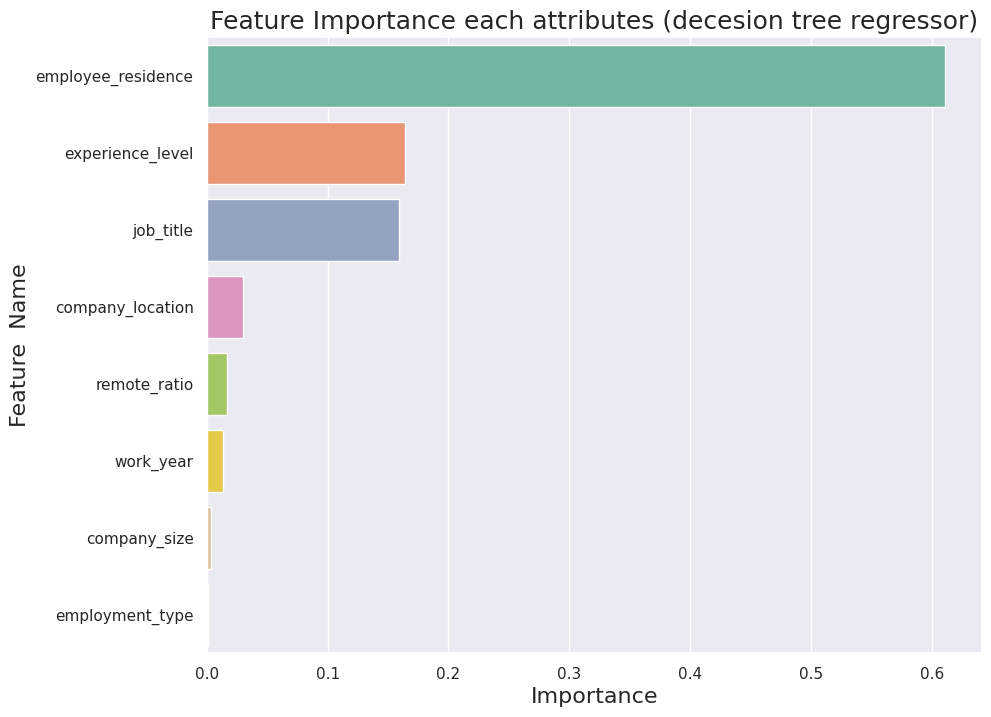

In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":dtree.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Importance each attributes (decesion tree regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature  Name',fontsize=16)
plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 14.8 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


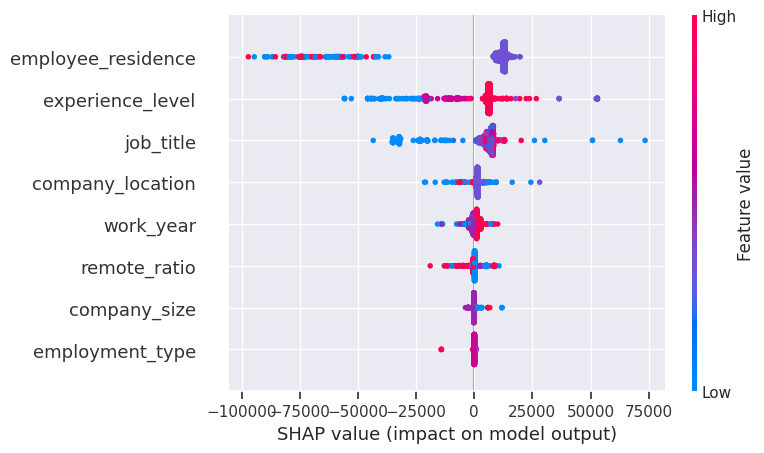

In [ ]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,(x_test))

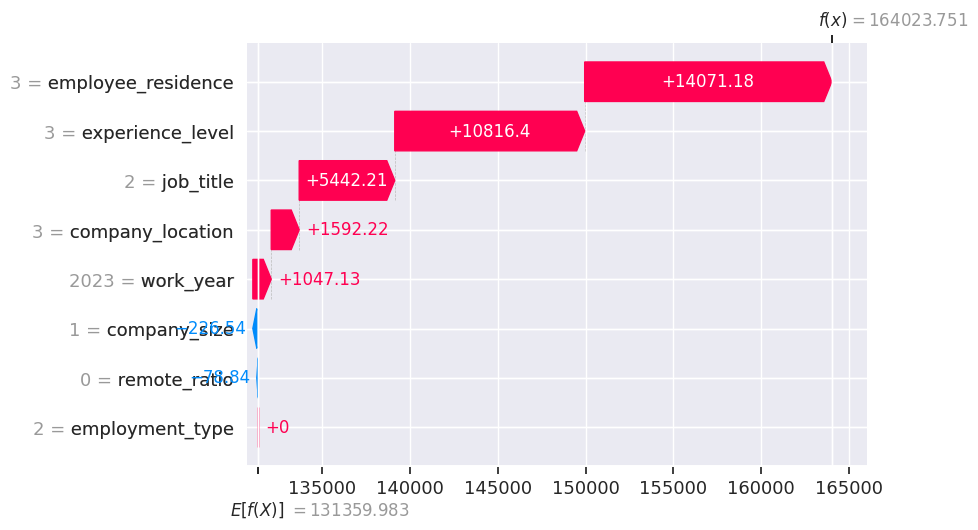

In [ ]:
explainer=shap.TreeExplainer(dtree,x_test)
shap_values=explainer(x_test)
shap.plots.waterfall(shap_values[0])

# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


#create a RandomForestRegressor object
rf=RandomForestRegressor()

#define the hyperparameters grid
param_grid={
    'max_depth':[3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]

}

#create a gridsearchCV object
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')

#fit the grid SearchCV object to the training data
grid_search.fit(x_train,y_train)

#print the best hyperparameters
print("Best Hyper parameters:",grid_search.best_params_)

Best Hyper parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0,max_depth=7,min_samples_split=10,min_samples_leaf=2)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                      random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=rf.predict(x_test)
mae=metrics.mean_absolute_percentage_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is{}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2  score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is0.3622058931721429
MAPE is 0.3622058931721429
MSE is 2710975143.538173
R2  score is 0.3645976778560128
RMSE score is 52067.02549155438


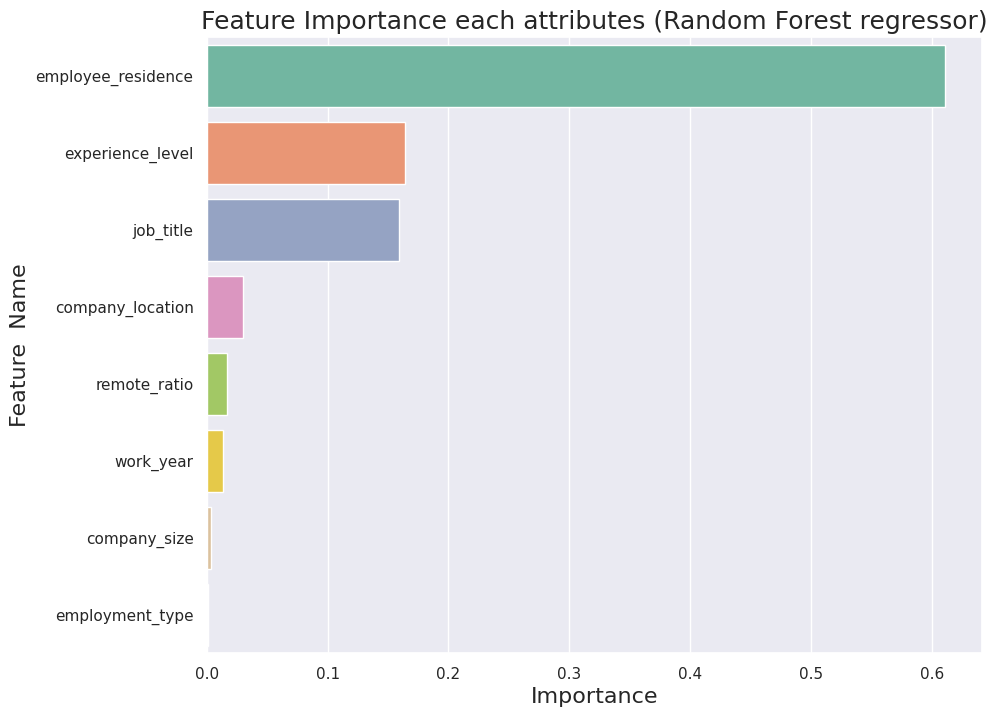

In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":dtree.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Importance each attributes (Random Forest regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature  Name',fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


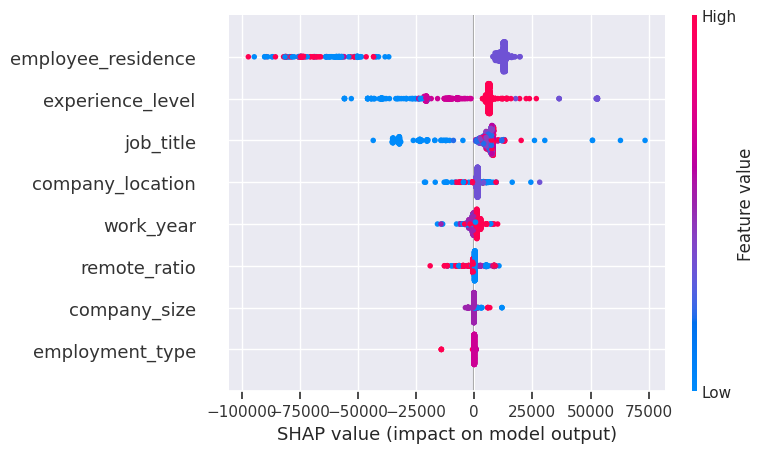

In [ ]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,(x_test))

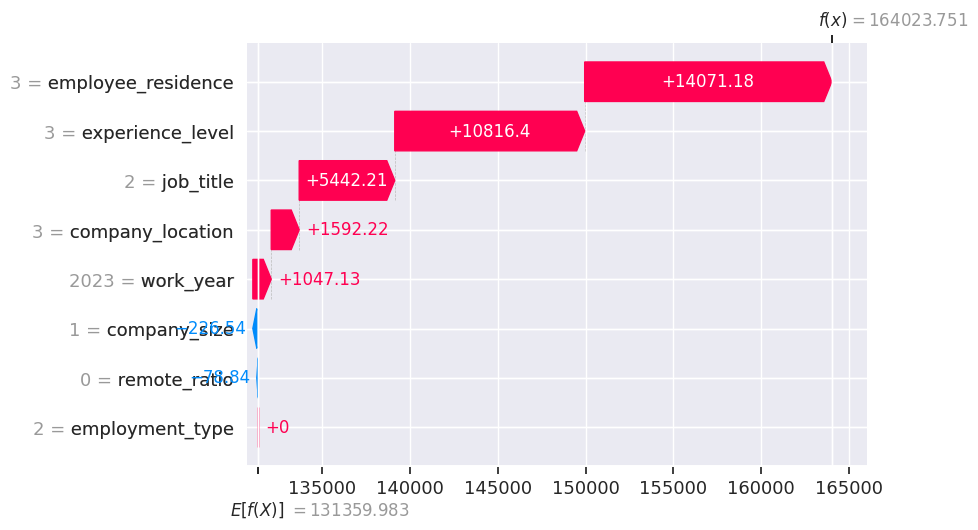

In [ ]:
explainer=shap.TreeExplainer(dtree,x_test)
shap_values=explainer(x_test)
shap.plots.waterfall(shap_values[0])